In [26]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

n_users = 1000
start_date = "2019-01-01"
end_date = "2024-12-31"
user_ids = [f"user_{i:04d}" for i in range(1, n_users + 1)]

full_dates = pd.date_range(start=start_date, end=end_date, freq="D")
salary_df = pd.DataFrame(index=full_dates)

day_choices = list(range(1, 32))

weights = [1]*10 + [2]*10 + [4]*5 + [6]*3 + [10]*3

np.random.seed(42)
preferred_days = np.random.choice(day_choices, size=n_users, p=np.array(weights)/sum(weights))
user_day_map = dict(zip(user_ids, preferred_days))


global_holidays = set(
    datetime(year, 1, 1) for year in range(2019, 2025)  # New Year's Day
).union(
    datetime(year, 12, 25) for year in range(2019, 2025)  # Christmas
)


def get_salary_date(year, month, preferred_day, holidays_set):
    try:
        date = datetime(year, month, preferred_day)
    except:
        return None

    while date.weekday() >= 5 or date in holidays_set:
        date -= timedelta(days=1)

    if np.random.rand() < 0.3:
        prev_day = date - timedelta(days=1)
        if prev_day.weekday() < 5 and prev_day not in holidays_set:
            date = prev_day

    return date

for user_id in user_ids:
    user_day = user_day_map[user_id]
    salary_dates = set()

    for year in range(2019, 2025):
        for month in range(1, 13):
            salary_date = get_salary_date(year, month, user_day, global_holidays)
            if salary_date and start_date <= salary_date.strftime("%Y-%m-%d") <= end_date:
                salary_dates.add(salary_date)

    indicator = [1 if d in salary_dates else 0 for d in full_dates]
    salary_df[user_id] = indicator


salary_df.index.name = "date"
salary_df.to_csv("salary_indicator.csv")
print("✅ Salary dataset with weighted days and holiday adjustment saved as salary_indicator.csv")

/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/1856933782.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  salary_df[user_id] = indicator
/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/1856933782.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  salary_df[user_id] = indicator
/var/folders/8g/y90dcmtn1t39t7rwgnkvjspm0000gn/T/ipykernel_41219/1856933782.py:56: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poo

✅ Salary dataset with weighted days and holiday adjustment saved as salary_indicator.csv


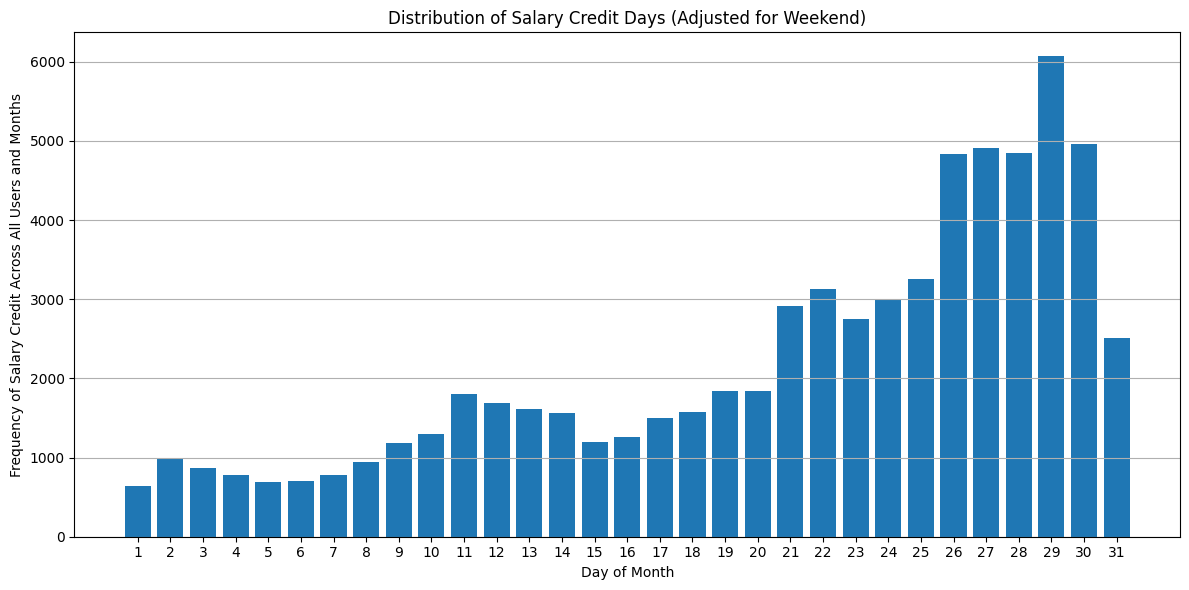

In [27]:
import matplotlib.pyplot as plt 

salary_long = salary_df.stack().reset_index()
salary_long.columns = ["date", "user", "indicator"]
salary_long = salary_long[salary_long["indicator"] == 1]
salary_long["day_of_month"] = salary_long["date"].dt.day

# Count frequency of salary credited on each day of the month
salary_day_distribution = salary_long["day_of_month"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(salary_day_distribution.index, salary_day_distribution.values)
plt.xlabel("Day of Month")
plt.ylabel("Frequency of Salary Credit Across All Users and Months")
plt.title("Distribution of Salary Credit Days (Adjusted for Weekend)")
plt.xticks(range(1, 32))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [28]:
salary_df.columns

Index(['user_0001', 'user_0002', 'user_0003', 'user_0004', 'user_0005',
       'user_0006', 'user_0007', 'user_0008', 'user_0009', 'user_0010',
       ...
       'user_0991', 'user_0992', 'user_0993', 'user_0994', 'user_0995',
       'user_0996', 'user_0997', 'user_0998', 'user_0999', 'user_1000'],
      dtype='object', length=1000)

In [29]:
datetime(2025, 5, 19).weekday()

0

In [30]:
salary_df.shape

(2192, 1000)

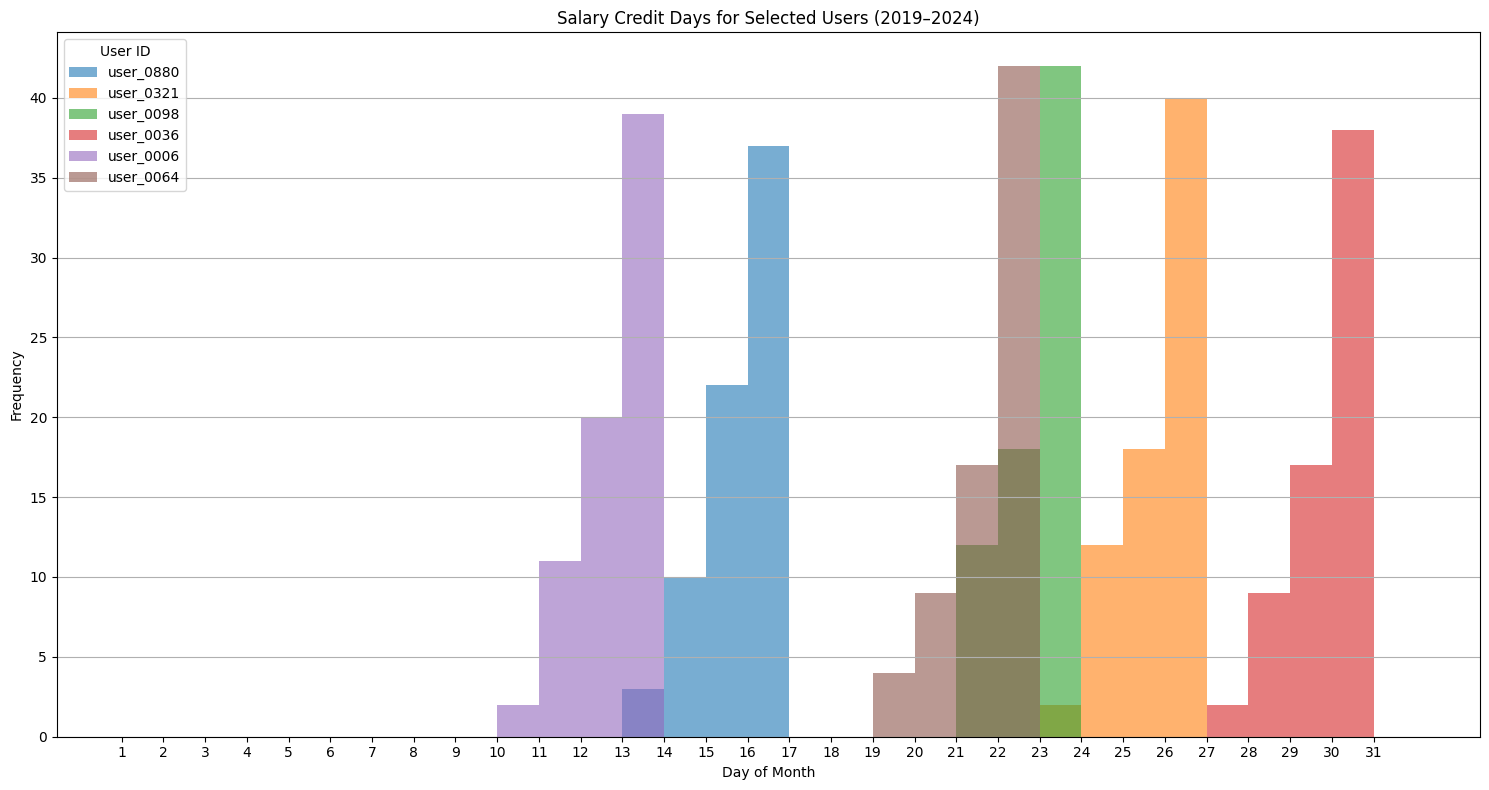

In [31]:
import random

'''
This is the function to randomly check the dates for the indicator.
'''
def plot_salary_dates_for_users(salary_df, user_ids, n_users=5):
    if user_ids is None:
        user_ids = random.sample(list(salary_df.columns), n_users)
    
    plt.figure(figsize=(15, 8))
    
    for user_id in user_ids:
        salary_dates = salary_df[salary_df[user_id] == 1].index
        days = salary_dates.day
        plt.hist(days, bins=np.arange(1, 33), alpha=0.6, label=user_id)

    plt.xlabel("Day of Month")
    plt.ylabel("Frequency")
    plt.title("Salary Credit Days for Selected Users (2019–2024)")
    plt.legend(title="User ID")
    plt.xticks(range(1, 32))
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

plot_salary_dates_for_users(salary_df, user_ids=None, n_users=6)

In [32]:
user_day_map

{'user_0001': 22,
 'user_0002': 31,
 'user_0003': 29,
 'user_0004': 27,
 'user_0005': 13,
 'user_0006': 13,
 'user_0007': 6,
 'user_0008': 30,
 'user_0009': 27,
 'user_0010': 29,
 'user_0011': 3,
 'user_0012': 31,
 'user_0013': 30,
 'user_0014': 16,
 'user_0015': 14,
 'user_0016': 14,
 'user_0017': 20,
 'user_0018': 26,
 'user_0019': 24,
 'user_0020': 20,
 'user_0021': 27,
 'user_0022': 12,
 'user_0023': 20,
 'user_0024': 22,
 'user_0025': 24,
 'user_0026': 29,
 'user_0027': 15,
 'user_0028': 26,
 'user_0029': 27,
 'user_0030': 5,
 'user_0031': 27,
 'user_0032': 14,
 'user_0033': 7,
 'user_0034': 31,
 'user_0035': 31,
 'user_0036': 30,
 'user_0037': 20,
 'user_0038': 10,
 'user_0039': 28,
 'user_0040': 24,
 'user_0041': 11,
 'user_0042': 25,
 'user_0043': 4,
 'user_0044': 31,
 'user_0045': 18,
 'user_0046': 28,
 'user_0047': 21,
 'user_0048': 26,
 'user_0049': 26,
 'user_0050': 15,
 'user_0051': 31,
 'user_0052': 29,
 'user_0053': 31,
 'user_0054': 30,
 'user_0055': 27,
 'user_0056': 3

In [36]:
def check_duplicate_salary_per_month(salary_df):
    violations = {}

    # Convert index to datetime if not already
    salary_df.index = pd.to_datetime(salary_df.index)

    # Group by year and month
    grouped = salary_df.groupby([salary_df.index.year, salary_df.index.month])

    for (year, month), group in grouped:
        # For each user, count how many times they got salary in this month
        monthly_sum = group.sum()
        multiple_payments = monthly_sum[monthly_sum > 1]

        if not multiple_payments.empty:
            for user_id, count in multiple_payments.items():
                if user_id not in violations:
                    violations[user_id] = []
                violations[user_id].append((year, month, int(count)))
    count=0
    if violations:
        print("⚠️ Duplicate salary entries found:")
        for user_id, months in violations.items():
            for year, month, count in months:
                print(f" - {user_id} received salary {count} times in {year}-{month:02d}")
                count=count+1
    else:
        print("✅ All accounts have exactly one salary per month.")

    return count

In [37]:
check_duplicate_salary_per_month(salary_df)

⚠️ Duplicate salary entries found:
 - user_0313 received salary 2 times in 2019-01
 - user_0313 received salary 2 times in 2019-10
 - user_0313 received salary 2 times in 2020-04
 - user_0313 received salary 2 times in 2020-12
 - user_0313 received salary 2 times in 2021-09
 - user_0313 received salary 2 times in 2022-03
 - user_0313 received salary 2 times in 2023-08
 - user_0313 received salary 2 times in 2024-10
 - user_0564 received salary 2 times in 2019-01
 - user_0564 received salary 2 times in 2019-05
 - user_0564 received salary 2 times in 2020-01
 - user_0564 received salary 2 times in 2020-07
 - user_0564 received salary 2 times in 2020-12
 - user_0564 received salary 2 times in 2021-04
 - user_0564 received salary 2 times in 2021-12
 - user_0564 received salary 2 times in 2022-06
 - user_0564 received salary 2 times in 2022-09
 - user_0564 received salary 2 times in 2023-03
 - user_0564 received salary 2 times in 2023-06
 - user_0564 received salary 2 times in 2024-05
 - us

3

In [41]:
user_day_map["user_0879"]

3

In [43]:
salary_df["user_0879"].head(45)

date
2019-01-01    0
2019-01-02    0
2019-01-03    1
2019-01-04    0
2019-01-05    0
2019-01-06    0
2019-01-07    0
2019-01-08    0
2019-01-09    0
2019-01-10    0
2019-01-11    0
2019-01-12    0
2019-01-13    0
2019-01-14    0
2019-01-15    0
2019-01-16    0
2019-01-17    0
2019-01-18    0
2019-01-19    0
2019-01-20    0
2019-01-21    0
2019-01-22    0
2019-01-23    0
2019-01-24    0
2019-01-25    0
2019-01-26    0
2019-01-27    0
2019-01-28    0
2019-01-29    0
2019-01-30    0
2019-01-31    1
2019-02-01    0
2019-02-02    0
2019-02-03    0
2019-02-04    0
2019-02-05    0
2019-02-06    0
2019-02-07    0
2019-02-08    0
2019-02-09    0
2019-02-10    0
2019-02-11    0
2019-02-12    0
2019-02-13    0
2019-02-14    0
Freq: D, Name: user_0879, dtype: int64

In [45]:
global_holidays

{datetime.datetime(2019, 1, 1, 0, 0),
 datetime.datetime(2019, 12, 25, 0, 0),
 datetime.datetime(2020, 1, 1, 0, 0),
 datetime.datetime(2020, 12, 25, 0, 0),
 datetime.datetime(2021, 1, 1, 0, 0),
 datetime.datetime(2021, 12, 25, 0, 0),
 datetime.datetime(2022, 1, 1, 0, 0),
 datetime.datetime(2022, 12, 25, 0, 0),
 datetime.datetime(2023, 1, 1, 0, 0),
 datetime.datetime(2023, 12, 25, 0, 0),
 datetime.datetime(2024, 1, 1, 0, 0),
 datetime.datetime(2024, 12, 25, 0, 0)}

In [48]:
datetime(2019, 2,1).weekday()

4